# Image
- 이미지를 구성하는 가장 작은 단위 -> pixel
- 하나의 pixel은 기본적으로 3개의 값(RGB)으로 구성 + 투명도가 추가될 수 있음
- 모든 이미지는 3차원 ndarray로 구성
- RGB에서 흑백처리를 하려면 RGB의 평균으로 각각의 값을 세팅

(426, 640, 3)


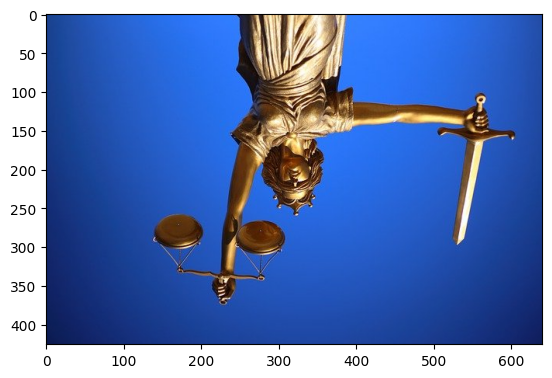

In [ ]:
# 이미지를 pixel로 표현
# 이미지를 표현하기 위해서 여러 개의 module을 이용

# 가장 대표적인 module이 matplotlib library
# 또 다른 module로 Pillow

# Module import
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# data
data = r'/content/drive/MyDrive/LikeLion/ML/data/images/justice.jpg'
img = Image.open(data)

# plt.imshow(img)
# plt.show()  # 이미지 좌표계가 출력되는 것을 확인

# 이미지 객체를 ndarray로 변환
# 이미지는 pixel의 집합이고 각 pixel은 3개의 값으로 구성
# 따라서 모든 이미지는 기본적으로 3차원 데이터
pixel = np.array(img)

print(pixel.shape)  # (426, 640, 3), (높이, 너비, 색상 채널의 수)

# 여러 가지 이미지 처리 가능
crop_img = img.crop((30, 100, 150, 300))

# plt.imshow(crop_img)
# plt.show()

resize_img = img.resize((100, 100))

# plt.imshow(resize_img)
# plt.show()

rotate_img = img.rotate(180)

plt.imshow(rotate_img)
plt.show()

(426, 640, 3)


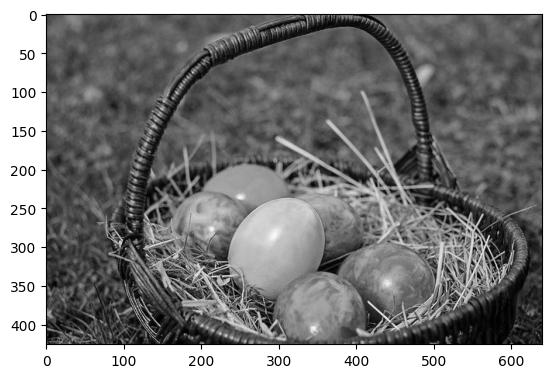

In [ ]:
# Module import
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# data
data = r'/content/drive/MyDrive/LikeLion/ML/data/images/fruits.jpg'
color_img = Image.open(data)

# plt.imshow(color_img)
# plt.show()

color_pixel = np.array(color_img)

# plt.imshow(color_pixel)
# plt.show()

# 흑백으로 처리
# 각 pixel의 RGB값의 평균을 구해서 RGB값을 평균값으로 각각 세팅
print(color_pixel.shape)  # (426, 640, 3)

gray_pixel = color_pixel.copy()

for y in range(gray_pixel.shape[0]):
    for x in range(gray_pixel.shape[1]):
        gray_pixel[y,x] = int(np.mean(gray_pixel[y,x]))

# plt.imshow(gray_pixel)
# plt.show()

# 3차원 흑백이미지를 2차원으로 표현
gray_2d_pixel = gray_pixel[:,:,0]

plt.imshow(gray_2d_pixel, cmap='gray')
plt.show()

- 이미지 학습의 문제점
    - DNN은 입력 데이터가 2차원(데이터 자체는 1차원이고 이런 데이터가 여러 개 있으므로 2차원)
    - 이미지의 경우 데이터 자체가 2~3 차원
    - 이런 이미지가 여러 장이므로 3~4 차원
    - 이미지를 입력으로 사용하기 위해서는 단일 데이터를 1차원으로 변경
    - MNIST 데이터의 경우도 28x28 데이터를 784개로 펼쳐서 사용
        - **공간 데이터가 유실** ✅
    - **회전한 이미지 데이터를 다른 이미지로 인식하는 문제** ✅

- MNIST는 28x28로 size가 작고 이미지가 복잡하지 않아서 정확도가 높았으나
- 실사 이미지를 이용하면 정확도가 상당히 좋지 않음
- 이런 이미지 학습을 가능하도록 한 알고리즘이 등장

 # CNN(Convolutional Neural Network)
 - 사람이 이미지를 인식하는 방법과 유사하게 학습을 진행
 - 이미지의 pixel을 학습하는 대신
 - 해당 이미지의 특징적인 부분을 찾아내고
 - 이런 특징들을 여러 개 만들어내서 pixel로 변환한 후 학습


- padding

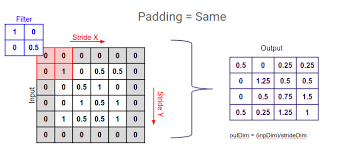

- max pooling

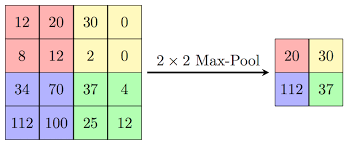

### Convolution

(429, 640, 3)
(1, 429, 640, 3)
(1, 429, 640, 1)
(3, 3, 1, 1)
(1, 427, 638, 1)


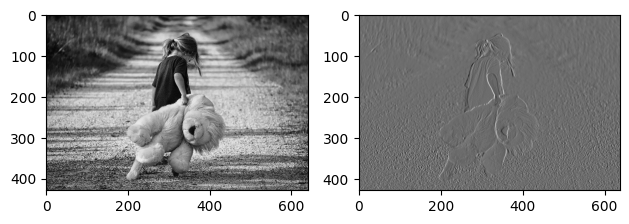

In [ ]:
# 원본 이미지에 대한 convolution 연산을 거쳐
# Feature Map을 추출

# Module import
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# 왼쪽 그림은 원본 이미지, 오른쪽 그림은 feature map
fig = plt.figure()

img_ori = fig.add_subplot(1,2,1)
img_feature = fig.add_subplot(1,2,2)

data = r'/content/drive/MyDrive/LikeLion/ML/data/images/girl-teddy.jpg'
origin_img = img.imread(data)
img_ori.imshow(origin_img)

print(origin_img.shape)  # (429, 640, 3)

# 입력데이터는 4차원으로 표현
# 우리가 사용하려는 API(Convolution 연산을 수행하는 API)의 입력 4차원
# (이미지 개수, height, width, color), 사진이 한 장이므로 개수에 1
# (1, 429, 640, 3)
input_image = origin_img.reshape((1,) + origin_img.shape)
print(input_image.shape)

# 픽셀값을 정수에서 실수로 변환
input_image = input_image.astype(np.float32)

# 입력 이미지의 형태(shape) => (1, 429, 640, 3)
# 입력 이미지의 channel을 변경해서 입력 이미지의 형태를
# (1, 429, 640, 1) 이 형태로 변환
channel_1_input_image = input_image[:,:,:,0:1]  #  주의! [:,:,:,0]은 인덱싱이 되어서 차원이 줄어듦
print(channel_1_input_image.shape)  # (1, 429, 640, 1)

# filter를 준비
# (3, 3, 1, 1) => (height, width, channel, 개수), 마지막 요소부터 하나씩 구현

filter = np.array([[[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]]])
print(filter.shape)  # (3, 3, 1, 1)

# strides => 1로 설정
# padding은 사용하지 않음(VALID), padding을 사용하고 싶으면(SAME)

conv2d = tf.nn.conv2d(channel_1_input_image,
                      filter,
                      strides=[1,1,1,1],
                      padding="VALID")

conv2d_result = conv2d.numpy()

# feature map의 shape
print(conv2d_result.shape)  # (1, 427, 638, 1)

t_img = conv2d_result[0,:,:,:]

img_feature.imshow(t_img, cmap='gray')

plt.tight_layout()
plt.show()

(376, 602, 3)
(1, 376, 602, 3)
(3, 3, 3, 1)
(1, 374, 600, 1)


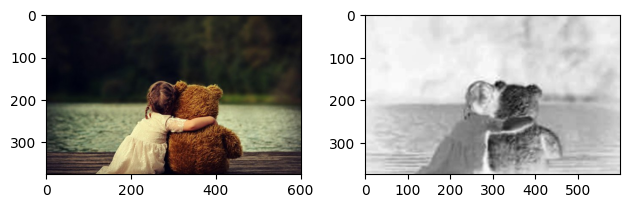

In [ ]:
# 원본 이미지(컬러 이미지)에 대한 convolution 연산을 거쳐
# Feature Map을 추출

# Module import
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# 왼쪽 그림은 원본 이미지, 오른쪽 그림은 feature map
fig = plt.figure()

img_ori = fig.add_subplot(1,2,1)
img_feature = fig.add_subplot(1,2,2)

data = r'/content/drive/MyDrive/LikeLion/ML/data/images/girl-teddy-color.jpg'
origin_img = img.imread(data)
img_ori.imshow(origin_img)

print(origin_img.shape)  # (376, 602, 3)

# 입력데이터는 4차원으로 표현
# 우리가 사용하려는 API(Convolution 연산을 수행하는 API)의 입력 4차원
# (이미지 개수, height, width, color), 사진이 한 장이므로 개수에 1
# (1, 376, 602, 3)
input_image = origin_img.reshape((1,) + origin_img.shape)
print(input_image.shape)

# 픽셀값을 정수에서 실수로 변환
input_image = input_image.astype(np.float32)

# filter를 준비
# (3, 3, 3, 1) => (height, width, channel, 개수), 마지막 요소부터 하나씩 구현

filter = np.array([[[[-1], [0], [1]],
                   [[-1], [0], [1]],
                   [[-1], [0], [1]]],
                   [[[-1], [0], [1]],
                   [[-1], [0], [1]],
                   [[-1], [0], [1]]],
                   [[[-1], [0], [1]],
                   [[-1], [0], [1]],
                   [[-1], [0], [1]]]])
print(filter.shape)  # (3, 3, 3, 1)

# strides => 1로 설정
# padding은 사용하지 않음(VALID), padding을 사용하고 싶으면(SAME)

conv2d = tf.nn.conv2d(input_image,
                      filter,
                      strides=[1,1,1,1],
                      padding="VALID")

conv2d_result = conv2d.numpy()

# feature map의 shape
print(conv2d_result.shape)  # (1, 374, 600, 1)

t_img = conv2d_result[0,:,:,:]

img_feature.imshow(t_img, cmap='gray')

plt.tight_layout()
plt.show()

### Pooling
- Convolution 연산을 수행하면 filter 개수에 따라 전체적인 data량이 증가
- Pooling: 데이터 양도 줄이면서 특성을 조금 더 명확히 하기 위한 방안
    - Max Pooling ⭐
    - Average Pooling
    - Min Pooling
- Convolution 연산을 수행 -> Feature Map
- ReLU 함수로 activation을 수행 -> Actication Map
- Activation Map에 Pooling 처리를 할 kernel 정의
- Max Pooling의 경우 Activation Map에 적용되는 kernel 범위 내에서 가장 큰 값 추출

(429, 640, 3)
(1, 429, 640, 3)
(1, 429, 640, 1)
(3, 3, 1, 1)
(1, 427, 638, 1)


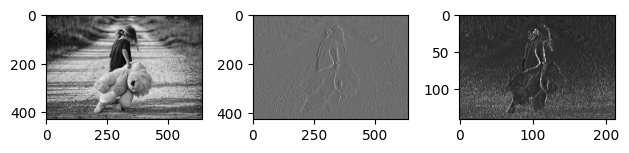

In [ ]:
# 원본 이미지에 대한 convolution 연산을 거쳐
# Feature Map을 추출
# Pooling 연산까지 수행

# Module import
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

# (원본 이미지, feature map, feature map에 pooling처리 한 결과)
fig = plt.figure()

img_ori = fig.add_subplot(1,3,1)
img_feature = fig.add_subplot(1,3,2)
img_pooling = fig.add_subplot(1,3,3)

data = r'/content/drive/MyDrive/LikeLion/ML/data/images/girl-teddy.jpg'
origin_img = img.imread(data)
img_ori.imshow(origin_img)

print(origin_img.shape)  # (429, 640, 3)

# 입력데이터는 4차원으로 표현
# 우리가 사용하려는 API(Convolution 연산을 수행하는 API)의 입력 4차원
# (이미지 개수, height, width, color), 사진이 한 장이므로 개수에 1
# (1, 429, 640, 3)
input_image = origin_img.reshape((1,) + origin_img.shape)
print(input_image.shape)

# 픽셀값을 정수에서 실수로 변환
input_image = input_image.astype(np.float32)

# 입력 이미지의 형태(shape) => (1, 429, 640, 3)
# 입력 이미지의 channel을 변경해서 입력 이미지의 형태를
# (1, 429, 640, 1) 이 형태로 변환
channel_1_input_image = input_image[:,:,:,0:1]  #  주의! [:,:,:,0]은 인덱싱이 되어서 차원이 줄어듦
print(channel_1_input_image.shape)  # (1, 429, 640, 1)

# filter를 준비
# (3, 3, 1, 1) => (height, width, channel, 개수), 마지막 요소부터 하나씩 구현

filter = np.array([[[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]]])
print(filter.shape)  # (3, 3, 1, 1)

# strides => 1로 설정
# padding은 사용하지 않음(VALID), padding을 사용하고 싶으면(SAME)

conv2d = tf.nn.conv2d(channel_1_input_image,
                      filter,
                      strides=[1,1,1,1],
                      padding="VALID")

conv2d_result = conv2d.numpy()

# feature map의 shape
print(conv2d_result.shape)  # (1, 427, 638, 1)

t_img = conv2d_result[0,:,:,:]

img_feature.imshow(t_img, cmap='gray')

# Pooling 처리
# kernerl의 크기만 설정, strides는 kernel의 크기에 따라 자동으로 설정
# 3x3
pool = tf.nn.max_pool(conv2d_result,
                      ksize=[1,3,3,1],   # 3x3 표현, 나머지 수는 4차원을 맞춰주기 위해서
                      strides=[1,3,3,1],
                      padding='VALID')
pool_result = pool.numpy()

p_img = pool_result[0,:,:,:]

img_pooling.imshow(p_img, cmap='gray')

plt.tight_layout()
plt.show()

(1, 142, 212, 1)


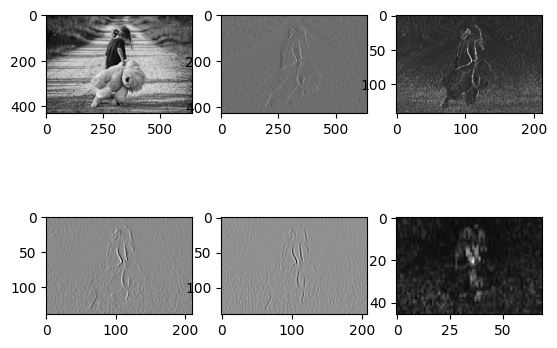

In [ ]:
# Pooling한 결과에 Convolution을 연속으로 2번 수행하고
# 마지막으로 Poolin을 1번 더 수행해서 결과를 출력

fig = plt.figure()

ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

# fig
ax1.imshow(origin_img)
ax2.imshow(t_img, cmap='gray')
ax3.imshow(p_img, cmap='gray')


print(pool_result.shape)

# filter
filter = np.array([[[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]],
                   [[[-1]], [[0]], [[1]]]])

# Convolution 2
conv2d_2 = tf.nn.conv2d(pool_result,
                        filter,
                        strides=[1,1,1,1],
                        padding="VALID")

conv2d_2_result = conv2d_2.numpy()

conv2d_2_img = conv2d_2_result[0,:,:,:]

# Convolution 3
conv2d_3 = tf.nn.conv2d(conv2d_2_result,
                        filter,
                        strides=[1,1,1,1],
                        padding="VALID")

conv2d_3_result = conv2d_3.numpy()

conv2d_3_img = conv2d_3_result[0,:,:,:]

# Pooling 2
pool_2 = tf.nn.max_pool(conv2d_3_result,
                        ksize=[1,3,3,1],
                        strides=[1,3,3,1],
                        padding='VALID')

pool_2_result = pool_2.numpy()

p_2_img = pool_2_result[0,:,:,:]

# fig
ax4.imshow(conv2d_2_img, cmap='gray')
ax5.imshow(conv2d_3_img, cmap='gray')
ax6.imshow(p_2_img, cmap='gray')

plt.show()


### CNN 구현
- MNIST 데이터

In [ ]:
# Module import
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Raw Data Loading
data = r'/content/drive/MyDrive/LikeLion/ML/data/mnist/train.csv'
df = pd.read_csv(data)

# 2차원 데이터
# 결측치도 없고 이상치도 없음

# feature, target 분리
x_data = df.drop('label', axis=1, inplace=False).values
t_data = df['label'].values

# Normalization
scaler = MinMaxScaler()
x_data_norm = scaler.fit_transform(x_data)

# train, test split
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = train_test_split(x_data_norm,
                                                                                  t_data,
                                                                                  stratify=t_data,
                                                                                  test_size=0.3,
                                                                                  random_state=0)

In [ ]:
# CNN Model
model = Sequential()

# filters: 출력 필터의 수
# kernel_size: 필터의 크기
# strides: 이동 스텝
# input_shape: 입력 데이터의 형태 지정, 첫 번째 layer에서만 정의
# padding: SAME - 사용, VALID - 사용X
model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 input_shape=(28,28,1)))

# pool_size: pooling window의 사이즈 정의
# strides: 기본적으로 pool_size와 동일
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

# 다음은 학습에 관련된 DNN
model.add(Flatten())  # 데이터를 1차원으로 평평하게 피기

# hidden layer
model.add(Dense(units=256,
                activation='relu'))

model.add(Dense(units=10,
                activation="softmax"))

# Compile
model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(x_data_train_norm.reshape(-1, 28, 28, 1),
                    t_data_train,
                    epochs=100,
                    validation_split=0.3,
                    batch_size=100,
                    verbose=1)

394/394 [==============================] - 1s 3ms/step - loss: 0.1139 - acc: 0.9890
[0.11385820806026459, 0.989047646522522]


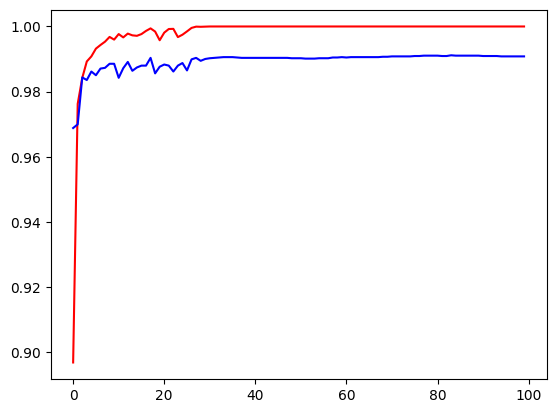

In [ ]:
# Eval
print(model.evaluate(x_data_test_norm.reshape(-1, 28, 28, 1),
                     t_data_test))
# [0.11385820806026459, 0.989047646522522]

# 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], color='r')
plt.plot(history.history['val_acc'], color='b')

plt.show()

### Dropout
- 신경망에서 과적합을 방지하고 모델의 일반화 성능을 향상시키기 위한 정규화 기법 중 하나
- 신경망의 일부 뉴런을 임의 선택하여 제외(비활성화)하여 다양한 특징을 학습하도록 도움

### Augmentation(증식)
- Data 수가 문제가 되는 경우(학습데이터가 적음)
- **Image Augmentation**
- 원본 이미지에 약간의 변화를 주어서 새로운 이미지를 만들어 내는 기법
    1. 회전
    2. 이미지 이동(상하좌우)
    3. 확대, 축소
    4. Flip(상하, 좌우 반전)
    - 이렇게 생성된 이미지는 학습에 도움이 됨
- **ImageDataGenerator**를 이용
    

### ImageDataGenerator

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
x_data의 shape: (20, 150, 150, 3)
t_data의 shape: (20,)


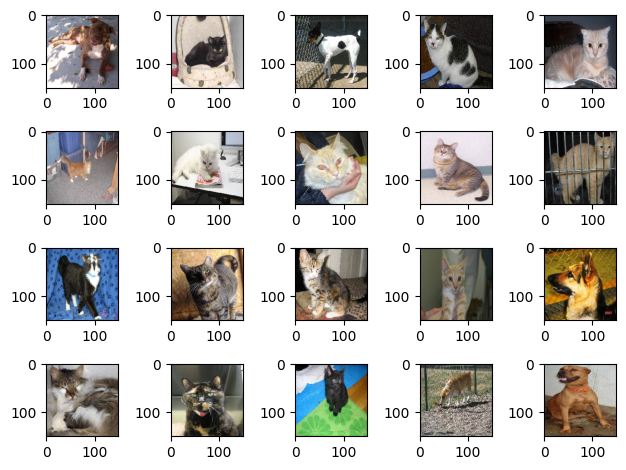

In [ ]:
# Keras가 제공하는 ImageDataGenerator를 사용

# Module import
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 학습을 위해 train data, validation data 분리
# 지금까지와는 다르게 validation data를 별도로 사용

train_dir = '/content/drive/MyDrive/LikeLion/ML/data/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/LikeLion/ML/data/cat_dog_small/validation'

# ImageDataGenerator 객체를 생성
# pixel값(RGB)은 각각 0~255 사이의 값
# 정규화 처리를 한 pixel 데이터를 가져오기 위해서 rescale을 사용

train_data_gen = ImageDataGenerator(rescale=1/255)
validation_data_gen = ImageDataGenerator(rescale=1/255)

train_generator = train_data_gen.flow_from_directory(
    train_dir,  # 어떤 폴더에서 이미지를 가져올지 설정
    classes=['cats', 'dogs'],  # 폴더명을 명시
                               # cats 폴더에서 가져온 픽셀데이터의 label을 0
                               # dogs 폴더에서 가져온 픽셀데이터의 label을 1로
    target_size=(150,150),     # 이미지 size를 똑같이 resize
    batch_size=20,             # 한 번에 20개의 이미지를 가져와서 pixel 데이터로 변환
                               # 주의 사항은 label에 상관없이 20개를 가져옴
    class_mode = 'binary'      # 다중분류인 경우 categorical

)

validation_generator = validation_data_gen.flow_from_directory(
    validation_dir,
    classes=['cats', 'dogs'],
    target_size=(150,150),
    batch_size=20,
    class_mode = 'binary'
)

# generator를 만들었으니 데이터를 잘 추출하는지 확인

# x_data는 이미지의 pixel data
# t_data는 이미지의 label
for x_data, t_data in train_generator:
    print(f'x_data의 shape: {x_data.shape}')  #(20, 150, 150, 3)
    print(f't_data의 shape: {t_data.shape}')
    break

# pixel 데이터를 이용해서 그림 그리기
fig = plt.figure()
axs = []  # subplot 저장

for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

for x_data, t_data in train_generator:
    for idx, img_data in enumerate(x_data):
        axs[idx].imshow(img_data)

    break

plt.tight_layout()
plt.show()

In [ ]:
# 위쪽에서 generator를 만들었으니 모델을 만들고 학습 진행

# Module import
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Model
model = Sequential()

# CNN 구현이므로 처음에는 Feature Extraction
model.add(Conv2D(filters=32,  # filter의 shape => (3,3,3,32) = (높이, 너비, 채널, 필터의 개수)
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

# FC(fully connected) Layer (DNN 학습)
model.add(Flatten()) # 4차원 데이터를 2차원으로 변형

model.add(Dense(units=512,
                activation='relu'))

model.add(Dense(units=1,
                activation='sigmoid'))

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

# Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 70, 70, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 35, 35, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 33, 33, 128)      

In [ ]:
# 학습 진행
from tensorflow.keras.callbacks import EarlyStopping

es_cb = EarlyStopping(monitor='val_loss',
                      patience=5,
                      restore_best_weights=True)

# 학습 데이터와 validation 데이터가 generator로 되어 있음
# train_generator의 경우 batch_size=20이므로 한 번 실행 시 20개의 pixel 가져옴
# 1 epoch 당 2000개의 이미지가 필요하므로
# train_generator를 100번 실행
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=50,
                    validation_data = validation_generator,
                    validation_steps=50,
                    callbacks=[es_cb],
                    verbose=1)

Epoch 1/50
100/100 [==============================] - 601s 6s/step - loss: 0.6921 - acc: 0.5240 - val_loss: 0.6779 - val_acc: 0.6170
Epoch 2/50
100/100 [==============================] - 12s 124ms/step - loss: 0.6472 - acc: 0.6195 - val_loss: 0.6224 - val_acc: 0.6470
Epoch 3/50
100/100 [==============================] - 9s 87ms/step - loss: 0.5817 - acc: 0.7045 - val_loss: 0.6229 - val_acc: 0.6540
Epoch 4/50
100/100 [==============================] - 10s 101ms/step - loss: 0.5179 - acc: 0.7445 - val_loss: 0.5970 - val_acc: 0.6910
Epoch 5/50
100/100 [==============================] - 9s 95ms/step - loss: 0.4674 - acc: 0.7765 - val_loss: 0.6345 - val_acc: 0.6780
Epoch 6/50
100/100 [==============================] - 9s 90ms/step - loss: 0.4203 - acc: 0.8135 - val_loss: 0.6259 - val_acc: 0.6880
Epoch 7/50
100/100 [==============================] - 10s 99ms/step - loss: 0.3684 - acc: 0.8360 - val_loss: 0.7548 - val_acc: 0.6470
Epoch 8/50
100/100 [==============================] - 9s 89ms/st

- overfitting이 많이 발생
- 가장 큰 이유는 이미지 수가 너무 적음
- 총 25,000개 중에 2,000개만 학습에 이용
- Image Augmentation을 통해서 학습 이미지 수를 늘려서 학습 진행

### Image Augmentation

<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


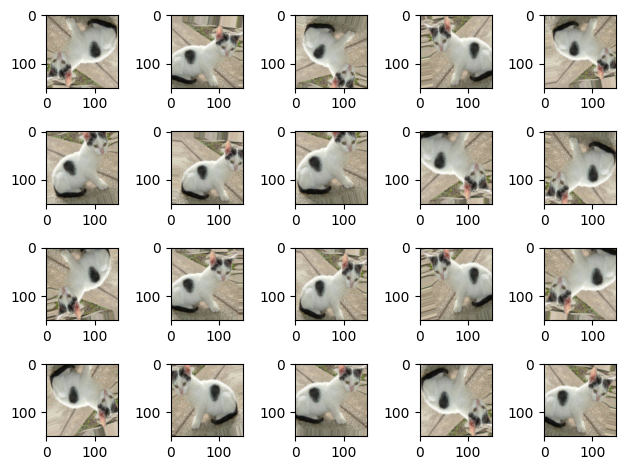

In [ ]:
# Image Augmentation이 포함된 코드

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='nearest')

img = image.load_img('/content/drive/MyDrive/LikeLion/ML/data/cat_dog_small/train/cats/cat.3.jpg',
                     target_size=(150,150))

x = image.img_to_array(img)
print(type(x))
print(x.shape)

# ImageDataGenerator를 이용해서 이 파일로부터 증식된 이미지 추출
# 기본적으로 ImageDataGenerator는 4차원 데이터를 이용하므로 우리 이미지도 4차원으로 표현
x = x.reshape((1,) + x.shape)
print(x.shape)

fig = plt.figure()
axs = []

# 20개 그림 그리기
for i in range(20):
    axs.append(fig.add_subplot(4,5,i+1))

idx = 0
for batch in datagen.flow(x, batch_size=1):
    axs[idx].imshow(image.array_to_img(batch[0]))
    idx += 1
    if idx % 20 == 0:
        break

plt.tight_layout()
plt.show()


- Augmentation을 이용해서 overfitting을 해소
- 여전히 학습이 잘 되지 않음을 확인(82%)
- CNN의 filter가 좋으면 이미지의 특징을 잘 추출
- 이번 모델의 경우 filter를 처음부터 직접 학습하여 성능이 상대적으로 좋지 않음
- 누군가가 아주 잘 만든 filter를 제공해 준다면
- Feature Extraction부분만 이용하여 모델 성능 향상 가능
- 여러가지 공개된 CNN 모델(filter가 좋은 형태로 완성된)의 Feature Extraction 부분을 이용

In [ ]:
# 우리가 가진 얼마 안 되는 데이터를
# 증식을 통해서 학습 데이터 수를 늘리고
# Dropout 기법도 활용해서 Overfitting을 줄이기

# Module import
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Loading
train_dir = '/content/drive/MyDrive/LikeLion/ML/data/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/LikeLion/ML/data/cat_dog_small/validation'

# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# validation data는 평가용 데이터이므로 증식하면 안 됨
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    classes=['cats', 'dogs'],
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              classes=['cats', 'dogs'],
                                                              target_size=(150,150),
                                                              batch_size=20,
                                                              class_mode='binary')

# Model
model = Sequential()

model.add(Conv2D(filters=32,
                kernel_size=(3,3),
                strides=(1,1),
                activation='relu',
                input_shape=(150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 ))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

# 여기까지가 Feature Extraction
# 이미지의 특징을 추출한 후 2차원으로 변경해서 학습을 진행

model.add(Flatten())  # 4차원 데이터를 2차원으로 변환 (이미지 3차원을 1차원으로 변경)
                      # (batch_size, height, width, channel)  # 4D
                      # (batch_size, height * width * channel)  # 2D

model.add(Dropout(rate=0.5))  # 설정된 비율만큼 임의의 뉴런 제외

# hidden layer
model.add(Dense(units=512,
                activation='relu'))

# output layer
model.add(Dense(units=1,
                activation='sigmoid'))

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

# overfitting 정도를 확인하기 위해서 EarlyStopping은 설정하지 않음
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_data = validation_generator,
                    validation_steps=50,
                    verbose=1)

# 오래 걸려서 런타임이 만료될 수 있으므로 학습이 끝나면 파일에 저장
# 학습이 끝난 우리의 모델과 계산된 가중치를 파일에 저장
model.save('/content/drive/MyDrive/LikeLion/ML/Model/cat_dog_small_cnn_model.h5')

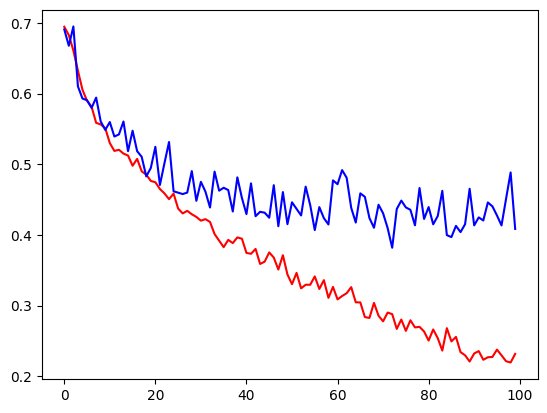

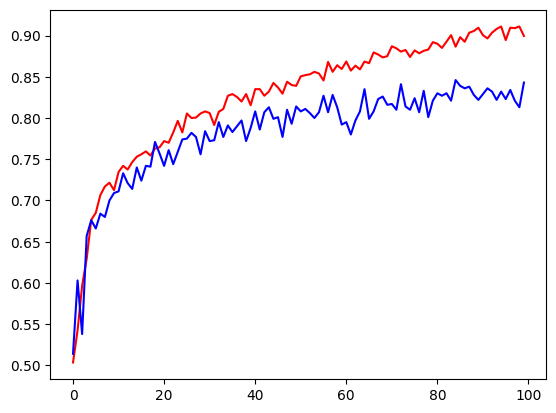

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
valid_loss = history.history['val_loss']

train_acc = history.history['acc']
valid_acc = history.history['val_acc']

plt.plot(train_loss, color='r')
plt.plot(valid_loss, color='b')
plt.show()

plt.plot(train_acc, color='r')
plt.plot(valid_acc, color='b')
plt.show()

### Transfer Learning(전이 학습)
- 기존 Network(기학습된 Network - Pretrained Network)

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/LikeLion/ML/data/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/LikeLion/ML/data/cat_dog_small/validation'

# ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# validation data는 증식을 사용하면 안되요! (평가용 데이터이기 때문)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=['cats', 'dogs'],
    target_size=(224,224),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes=['cats', 'dogs'],
    target_size=(224,224),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Model
# VGG16이라는 Pretrained Network를 이용
from tensorflow.keras.applications import VGG16

# VGG16은 이미 만들어진 CNN 모델
# 이 모델을 만들기 위한 입력 데이터셋이 존재
# 전세계적으로 유명한 데이터셋(COCO Dataset, PASCAL VOC Dataset, Imagenet Dataset, ...)
# weights: 어떤 데이터셋으로 만들어진 모델인지 정의
# include_top: classifier 포함 여부
#              False이면 classifer는 빼고 Feature Extraction 부분만 가져오기
model_base = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(224,224,3))

model_base.trainable = False  # Convolution Layer 동결

model_base.summary()

# input_1(InputLayer)       [(None, 224, 224, 3)]    0
# 이 모델은 입력으로 (224, 224, 3) 형태를 받음
# 이미지 1장이 결국 (7, 7, 512) 형태로 변환
# 기본적으로는 classifier가 포함되어 있음
# classifier는 사용할 수 없으니 제거

# Total params: 14714688 (56.13 MB) => 전체 파라미터 수
# Trainable params: 14714688 (56.13MB) => 학습할 때 갱신되는 파라미터 수
# ==> epoch이 진행될 때 자동으로 updat되는 파라미터의 수
# ==> 학습이 안 되도록 처리해야 함
# ==> Non-trainable params: 1471688 (56.13 MB)이 되도록

# Model
model = Sequential()

model.add(model_base)  # 우리 모델의 앞부분에 pretrained network 삽입

# Classifier
model.add(Flatten())

# Hidden Layer
model.add(Dense(units=512,
                activation='relu'))

model.add(Dropout(rate=0.5))

# Output Layer
model.add(Dense(units=1,
                activation='sigmoid'))

# model.summary()

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=1)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

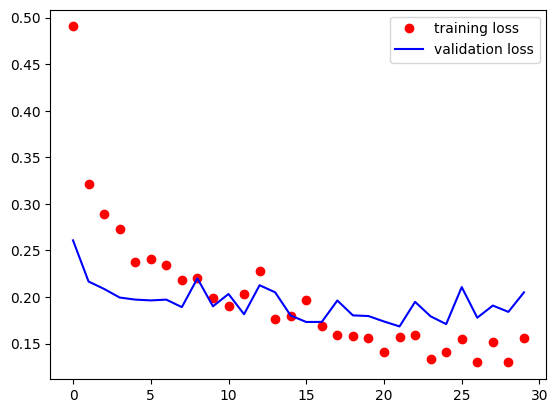

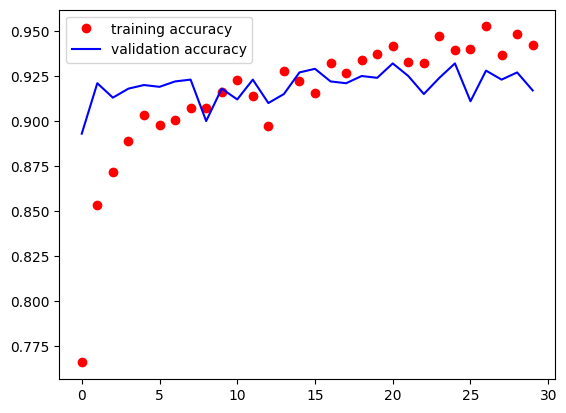

In [ ]:
# 시각화를 통한 overfitting 확인
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

train_acc = history.history['acc']
valid_acc = history.history['val_acc']

plt.plot(train_loss,
         'o',
         color='r',
         label='training loss')

plt.plot(valid_loss,
         color='b',
         label='validation loss')

plt.legend()
plt.show()

plt.plot(train_acc,
         'o',
         color='r',
         label='training accuracy')

plt.plot(valid_acc,
         color='b',
         label='validation accuracy')

plt.legend()
plt.show()

In [ ]:
# 학습한 모델을 일단 파일로 저장
model.save('/content/drive/MyDrive/LikeLion/ML/Model/12.19.CNN_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Fine Tuning
# 학습이 한 번 끝났기 때문에
# 상위 convolution layer의 동결을 풀고 학습을 한 번 더 수행

# 파일로 저장되어 있는 model loading
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/LikeLion/ML/Model/12.19.CNN_model.h5')

model.summary()

# 동결 해제
# Pretrained Network
model_base = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(224,224,3))

model_base.trainable = False  # Convolution Layer 동결

for layer in model_base.layers:
    if layer.name in ['block5_conv1', 'block5_conv2', 'block5_conv3']:
        layer.trainable = True  # 해당 layer의 동결 풀림
    else:
        layer.trainable = False

# 이렇게 모델을 다시 만들고 학습을 한 번 더 진행
# => fine tuning (큰 변화는 아니지만 어느 정도 모델의 정확도를 올릴 수 있음)

model_base.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_10 (Dense)            (None, 512)               12845568  
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 513       
                                                                 
Total params: 27560769 (105.14 MB)
Trainable params: 12846081 (49.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Model